# 1. HTML 크롤링

### 표준 Crawling 형태 [html 태그만 이용]

In [9]:
import requests #request 라이브러리 import. BeautifulSoup인자로 필요함. 
from bs4 import BeautifulSoup #bs4라이브러리에서 BeautifulSoup 모듈 임포트. html을 parsing하는데 필요함. 
res = requests.get('http://www.hani.co.kr/arti/society/society_general/974548.html') #request라는 라이브러리에 있는 get()메소드를 이용. get()메소드 인자로 싸이트를 입력하고 res라는 객체를 만듦. 
soup = BeautifulSoup(res.content,'html.parser')# BeautifulSoup이라는 클래스의 인자로 res객체에 content method를 입력값으로 줌. 그리고 html형태의 문자를 pasring. 앞에서 언급한 기능을 합한 soup이라는 객체를 만듦. 
mydata = soup.find("title") #soup이라는 객체가 가지고 있는 find라는 메소드 기능을 이용해서 html 테그인 title을 찾는 객체 mydat를 만듦. 
print(mydata.get_text()) #mydata라는 객체가 가지고 있는 get_text()메소드 기능을 이용해서 html테그와 속성을 제외한 순수 글씨를 추출 

[전문] 청와대에 ‘사의 표명’ 전 추미애 장관이 한 말 : 사회일반 : 사회 : 뉴스 : 한겨레


In [16]:
import requests 
from bs4 import BeautifulSoup 
res = requests.get('http://www.hani.co.kr/arti/area/capital/974672.html?_fr=st1') 
soup = BeautifulSoup(res.content,'html.parser')
mydata = soup.find("title") 
print(mydata.get_text())

서울 정무부시장 “3단계 격상, 지연시킬 이유 없다” : 수도권 : 전국 : 뉴스 : 한겨레


### 위와같은 방법으로 네이버 뉴스를 Crawling을 했더니 에러가 났다. 

In [23]:
#네이버에서는 에러가 남. 
import requests 
from bs4 import BeautifulSoup 
res = requests.get('https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=001&aid=0012086907&isYeonhapFlash=Y&rc=N') 
soup = BeautifulSoup(res.content,'html.parser')
mydata = soup.find("title") 
print(mydata.get_text())

SyntaxError: EOL while scanning string literal (<ipython-input-23-cf4af281f9d8>, line 4)

### 해결 방법
웹페이지에서 크롤링을 막는다? - 안티 크롤링(Anti-Crawling)  
바로 데이터 수집을 시작할 수도 있지만 종종 웹페이지에서 크롤링을 통한 데이터수집을 막아놓는 경우가 있습니다.   
먼저, 크롤링 행위 자체는 불법이 아닙니다. 우리가 만드는 웹크롤링은 웹브라우저를 통해 확인할 수 있는 데이터를 가져오는 것이기 때문에 기업의 서버를 공격해서  데이터를 훔쳐오는 해킹과는 완전히 다른 행위입니다.  
[판결]'웹사이트 무단 크롤링' 소송... 잡코리아, 사람인에 승소  
하지만, 위의 기사내용과 같이 크롤링을 통해 수집한 데이터를 부정경쟁의 수단으로 사용하는 경우에는 분명 처벌받을 수 있습니다. 인터넷 서비스 제공업체들은 이와  같은 상황을 미연에 방지하기 위하여 다양한 방법을 사용해서 데이터수집을 방해하고있습니다. 이런 정책/기술을 안티 크롤링(Anti-Crawling)이라고 합니다.  

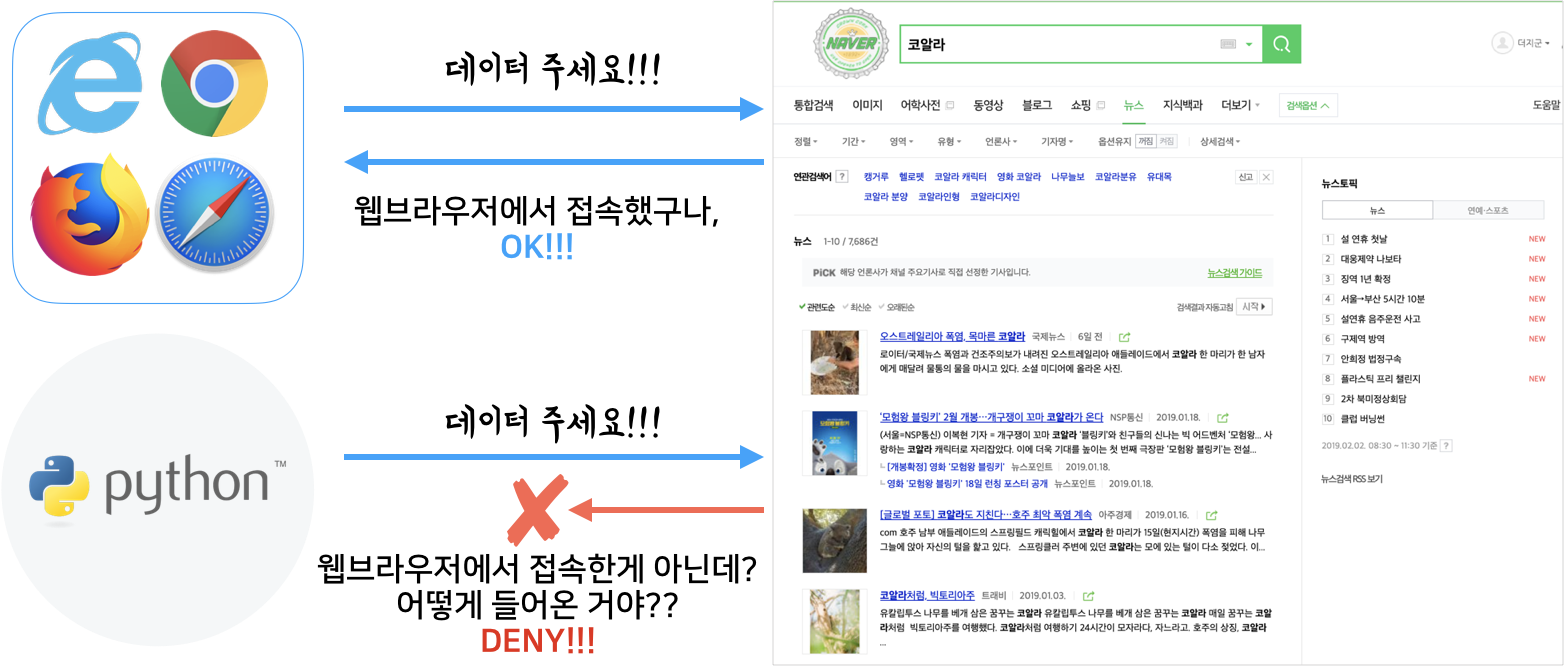

In [32]:
from IPython.display import Image
Image("./anti_crawling.png")

In [33]:
#네이버에서는 에러가 남. 
import requests 
from bs4 import BeautifulSoup 
res = requests.get('https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=001&aid=0012086907&isYeonhapFlash=Y&rc=N',headers={'User-Agent':'Mozilla/5.0'}) 
soup = BeautifulSoup(res.content,'html.parser' )
mydata = soup.find("title") 
print(mydata.get_text())

[1보] 문대통령 "2021년에 경제 대전환…코로나 극복이 시작" : 네이버 뉴스


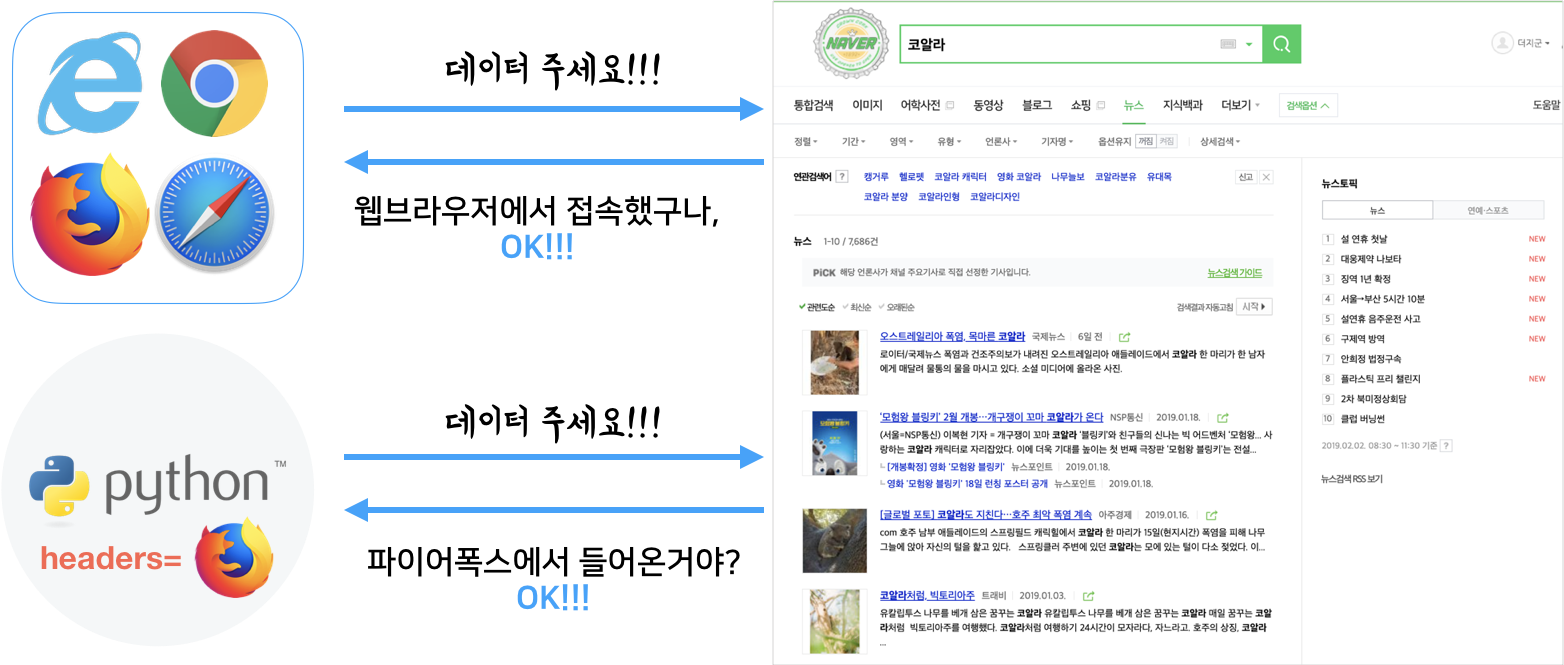

In [34]:
Image("./anti_crawling_sol.png")

### p태그 문장이 두개인데 이 중에 하나를 선택하려면? 

- data = soup.find('p', class_= 'cssstyle')  
    - 객체이름 = soup.find('p', 속성 = '속성값')
      
- data = soup.find('p','cssstyle')  
    - 객체이름 = soup.find('p', '속성값')  
       
- data = soup.find('p', attrs = {'속성':'속성값', '속성':'속성값'})     

- data = soup.find(id='body')
    - 객체이름 = soup.find(id = 'id값')

### find_all은 리스트 형태로 가져오기 때문에 for문을 돌려서 출력해야한다. 

# 2. CSS 크롤링

In [37]:
import requests 
from bs4 import BeautifulSoup 
res = requests.get('https://news.naver.com/main/ranking/read.nhn?mode=LSD&mid=shm&sid1=001&oid=001&aid=0012087252&rankingType=RANKING',headers={'User-Agent':'Mozilla/5.0'}) 
soup = BeautifulSoup(res.content,'html.parser' )
mydata = soup.find('a', class_ ='nclicks(LNB.soc)') 
print(mydata.get_text())

사회 


In [40]:
import requests 
from bs4 import BeautifulSoup 
res = requests.get('https://news.naver.com/main/ranking/read.nhn?mode=LSD&mid=shm&sid1=001&oid=001&aid=0012087252&rankingType=RANKING',headers={'User-Agent':'Mozilla/5.0'}) 
soup = BeautifulSoup(res.content,'html.parser' )
mydata = soup.find_all('span', class_ ='tx') 
for item in mydata:
    print(item.get_text())


뉴스홈
속보
정치
경제
사회
생활/문화
세계
IT/과학
오피니언
포토
TV
랭킹뉴스
검색


### class가 이중으로 있을 경우 [띄어쓰기]

In [41]:
import requests 
from bs4 import BeautifulSoup 
res = requests.get('https://news.naver.com/main/ranking/read.nhn?mode=LSD&mid=shm&sid1=001&oid=001&aid=0012087252&rankingType=RANKING',headers={'User-Agent':'Mozilla/5.0'}) 
soup = BeautifulSoup(res.content,'html.parser' )
mydata = soup.find('button', class_ ='head_channel_button nclicks(atp_pick)') 
mydata.get_text()

'\nPICK\n안내\n'

### 여러 속성값을 이용해서 출력하기 [안전성]

In [42]:
import requests 
from bs4 import BeautifulSoup 
res = requests.get('https://news.naver.com/main/ranking/read.nhn?mode=LSD&mid=shm&sid1=001&oid=001&aid=0012087252&rankingType=RANKING',headers={'User-Agent':'Mozilla/5.0'}) 
soup = BeautifulSoup(res.content,'html.parser' )
mydata = soup.find('button', attrs = {'type':'button', 'class':'head_channel_button nclicks(atp_pick)'}) 
mydata.get_text()

'\nPICK\n안내\n'